# Gráficos

In [4]:
import simulation as sim
import generators as gen
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gens = [gen.GCL(), gen.XORShift(), gen.PCG()]
dataframes, colas = zip(*[sim.main(g) for g in gens])
dataframes = list(dataframes)
colas = list(colas)
nombres = [g.getName() for g in gens]

/home/santiago/Repositories/ModeloTE/generators.py:86: RuntimeWarning: overflow encountered in scalar multiply
  self.state = np.uint64(x * self.multiplier + self.increment)
/home/santiago/Repositories/ModeloTE/generators.py:89: RuntimeWarning: overflow encountered in scalar subtract
  random_u = random_int / (np.uint32(0)-1)
/home/santiago/Repositories/ModeloTE/generators.py:86: RuntimeWarning: overflow encountered in scalar add
  self.state = np.uint64(x * self.multiplier + self.increment)


In [28]:
dataframes[1]

,TLlegada,TEspera,TEnSistema,Duracion,TInicio,TFin
0,0.003312,0.000000,0.000960,0.000960,0.003312,0.004273
1,0.114160,0.000000,0.026255,0.026255,0.114160,0.140415
2,0.125687,0.014728,0.046611,0.031883,0.140415,0.172298
3,0.135846,0.036453,0.060198,0.023745,0.172298,0.196043
4,0.200458,0.000000,0.020742,0.020742,0.200458,0.221201
...,...,...,...,...,...,...
986,47.963826,0.384932,0.435517,0.050586,48.348757,48.399343
987,47.966221,0.433122,0.462162,0.029040,48.399343,48.428384
988,47.974185,0.454198,0.458967,0.004769,48.428384,48.433153
989,47.999865,0.433288,0.439588,0.006301,48.433153,48.439453


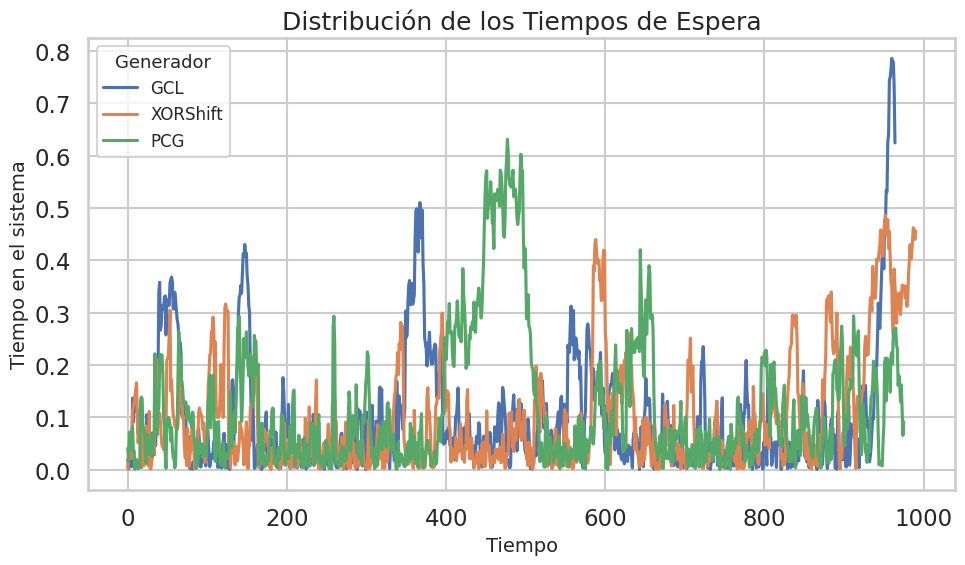

In [5]:

# Lindo estilo de Seaborn :)
sns.set(style="whitegrid", context="talk", palette="deep")  # 'talk' es ideal para presentaciones

plt.figure(figsize=(10, 6))

for df, nombre in zip(dataframes, nombres):
    sns.lineplot(data=df, x=df.index, y='TEnSistema', label=nombre)

plt.title('Distribución de los Tiempos de Espera', fontsize=18)
plt.xlabel('Tiempo', fontsize=14)
plt.ylabel('Tiempo en el sistema', fontsize=14)
plt.legend(title='Generador', fontsize=12, title_fontsize=13)
plt.tight_layout()

# Mostrar gráfico
plt.show()


#### Tasa de utilización del servidor en función del tiempo

#### Tiempo promedio en el sistema por cliente

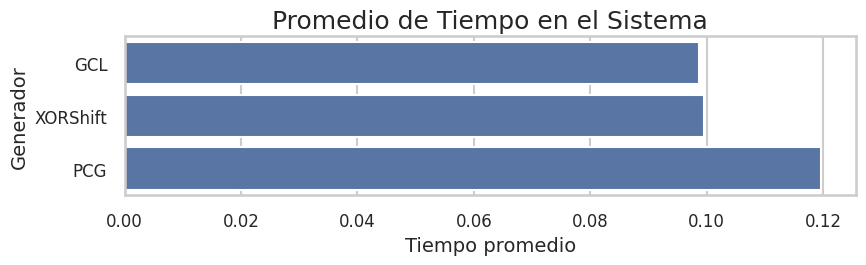

In [7]:


# Calcular los promedios
avgs = [df['TEnSistema'].mean() for df in dataframes]
df_avgs = pd.Series(avgs, index=nombres)

# Crear figura
plt.figure(figsize=(9, 3))  # Más ancho para que los nombres no se amontonen

# Crear gráfico de barras horizontales
sns.barplot(x=df_avgs.values, y=df_avgs.index, orient='h')

# Personalización
plt.title('Promedio de Tiempo en el Sistema', fontsize=18)
plt.xlabel('Tiempo promedio', fontsize=14)
plt.ylabel('Generador', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Mostrar gráfico
plt.show()


#### Distribución de los tiempos de espera

#### Porcentaje de tiempo que el servidor está ocupado

#### Evolución de la longitud de la cola en el tiempo

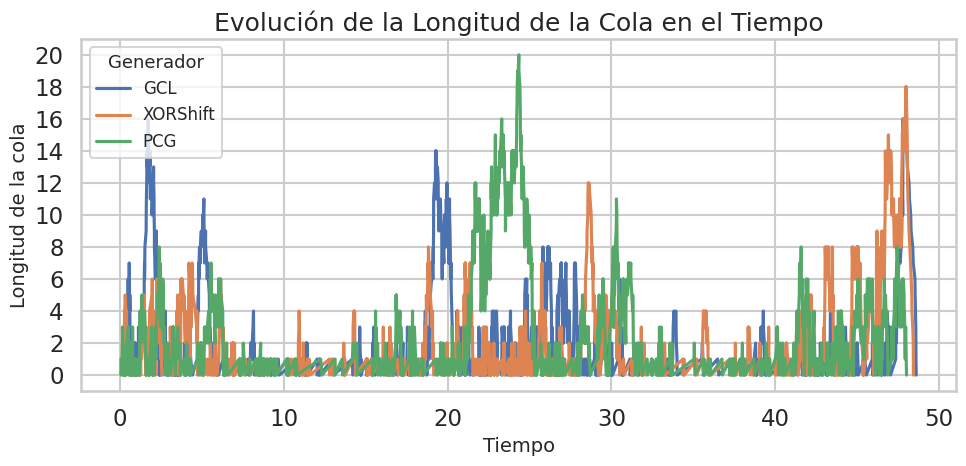

In [8]:
# Crear figura
plt.figure(figsize=(10, 5))

# Graficar cada cola
for cola, nombre in zip(colas, nombres):
    tiempo, longitud = zip(*cola)
    sns.lineplot(x=tiempo, y=longitud, label=nombre)

plt.yticks(range(0, 21, 2)) 
plt.xlabel('Tiempo', fontsize=14)
plt.ylabel('Longitud de la cola', fontsize=14)
plt.title('Evolución de la Longitud de la Cola en el Tiempo', fontsize=18)
plt.legend(title='Generador', fontsize=12, title_fontsize=13)
plt.tight_layout()

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Preparar los datos en un solo DataFrame con una columna 'Generador'
df_combined = pd.concat(
    [df.assign(Generador=nombre) for df, nombre in zip(dataframes, nombres)],
    ignore_index=True
)

# Estilo visual
sns.set(style="whitegrid", context="talk", palette="deep")

# Crear el FacetGrid para los histogramas
g = sns.FacetGrid(df_combined, col="Generador", col_wrap=3, height=4, sharex=True, sharey=True)
g.map_dataframe(sns.histplot, x="TEspera", bins=30, kde=False)

# Personalización
g.set_axis_labels("Tiempo de espera", "Frecuencia")
g.set_titles(col_template="{col_name}")
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Distribución de los Tiempos de Espera por Generador", fontsize=18)

plt.show()
plt.show()


#### Histograma de los tiempos de espera en el sistema

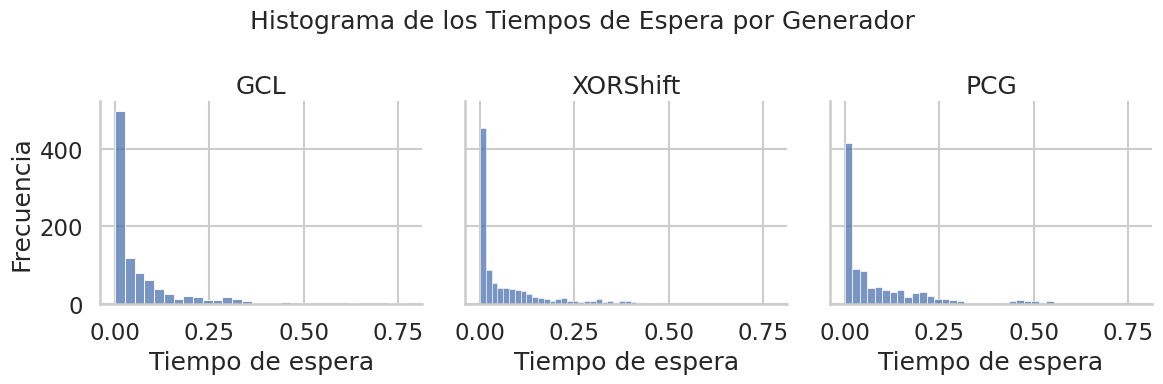

In [25]:
# Combinamos los dataframes porque hace todo un poco más fácil para usar FaceGrid
df_combined = pd.concat(
    [df.assign(Generador=nombre) for df, nombre in zip(dataframes, nombres)],
    ignore_index=True
)

g = sns.FacetGrid(df_combined, col="Generador", col_wrap=3, height=4, sharex=True, sharey=True)
g.map_dataframe(sns.histplot, x="TEspera", bins=30, kde=False)

# Personalización
g.set_axis_labels("Tiempo de espera", "Frecuencia")
g.set_titles(col_template="{col_name}")
plt.subplots_adjust(top=0.75)
g.fig.suptitle("Histograma de los Tiempos de Espera por Generador", fontsize=18)

plt.show()


#### Distribución del tiempo entre arribos y de servicios simulados

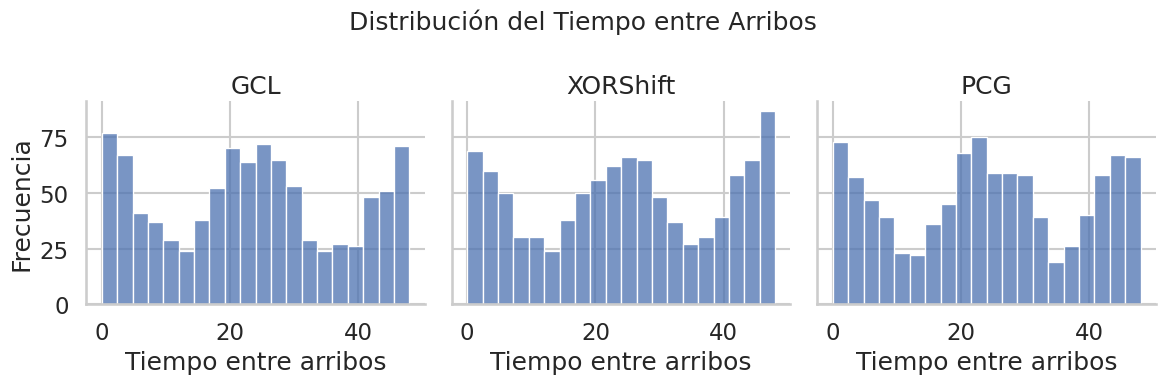

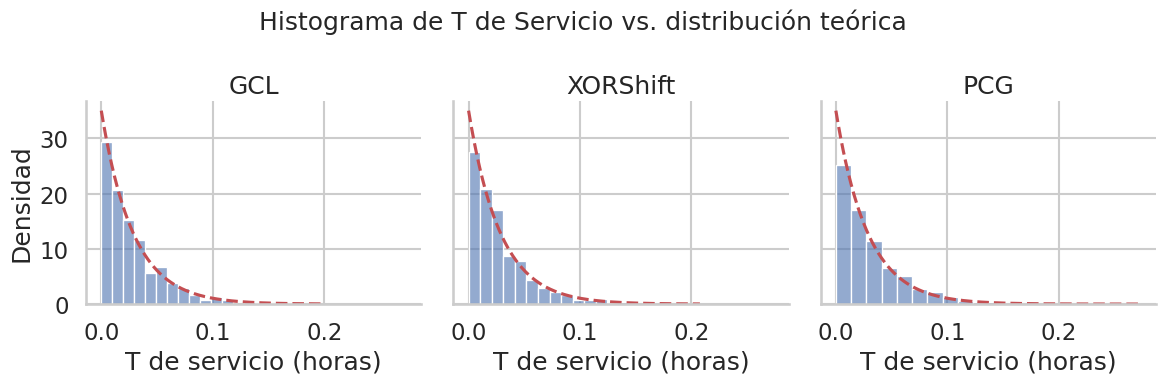

In [27]:
from scipy.stats import expon
import numpy as np

# Preparar los datos en un solo DataFrame con columna 'Generador'
df_combined = pd.concat(
    [df.assign(Generador=nombre) for df, nombre in zip(dataframes, nombres)],
    ignore_index=True
)

# TIEMPO ENTRE ARRIBOS-------------------------------------
g1 = sns.FacetGrid(df_combined, col="Generador", col_wrap=3, height=4, sharex=True, sharey=True)
g1.map_dataframe(sns.histplot, x="TLlegada", bins=20, kde=False)

g1.set_axis_labels("Tiempo entre arribos", "Frecuencia")
g1.set_titles(col_template="{col_name}")
g1.fig.suptitle("Distribución del Tiempo entre Arribos", fontsize=18)
plt.subplots_adjust(top=0.75)
plt.show()

# TIEMPO DE SERVICIO-------------------------------------

lambda_servicio = 35
scale = 1 / lambda_servicio  # media = 1/lambda

# Crear FacetGrid
g = sns.FacetGrid(df_combined, col="Generador", col_wrap=3, height=4, sharex=True, sharey=True)

# Función que grafica histograma + densidad teórica
def plot_with_exponential(data, color, **kwargs):
    sns.histplot(data=data, x="Duracion", bins=20, stat="density", color=color, alpha=0.6)
    
    x = np.linspace(0, data["Duracion"].max(), 500)
    y = expon.pdf(x, scale=scale)
    
    plt.plot(x, y, 'r--', label='Exp(λ=35/hora)')
    plt.legend()


g.map_dataframe(plot_with_exponential)

# Etiquetas y título
g.set_axis_labels("T de servicio (horas)", "Densidad")
g.set_titles(col_template="{col_name}")
g.fig.suptitle("Histograma de T de Servicio vs. distribución teórica", fontsize=18)
# Acá también necesitamos esta línea fea porque de otro modo el título de cada subplot se 
# cruza con el título del plot
plt.subplots_adjust(top=0.75)

# Mostrar
plt.show()



# Porcentaje del tiempo que el servidor estuvo ocupado 

Debemos computar por cada generador 

$$
\frac{T_{\text{Ocupado}}}{T_{\text{Total}}}
$$

Pero el tiemop que estuvo ocupado no es más que $\sum \text{Duraciones}$.

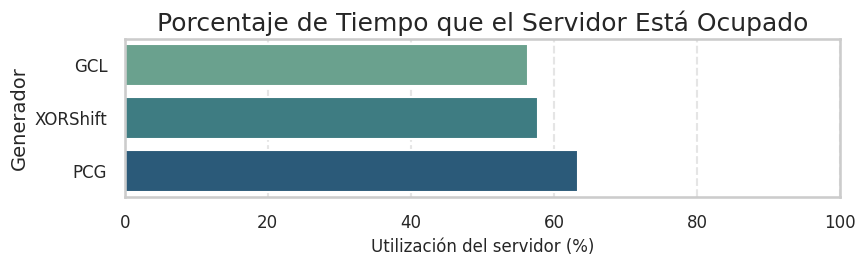

In [36]:
# Calcular utilización para cada dataframe
utilizaciones = [
    df['Duracion'].sum() / df['TFin'].max() * 100  # porcentaje
    for df in dataframes
]

# DF Util tiene los tiempos totales de utilizacion por cada generador
df_util = pd.Series(utilizaciones, index=nombres)


plt.figure(figsize=(9, 3))
sns.barplot(x=df_util.values, y=df_util.index, orient='h', palette="crest", hue=df_util.index, legend=False)
plt.xlabel('Utilización del servidor (%)', fontsize=12)
plt.ylabel('Generador', fontsize=14)
plt.title('Porcentaje de Tiempo que el Servidor Está Ocupado', fontsize=18)
plt.xlim(0, 100)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()

# Mostrar gráfico
plt.show()


# Tasa de utilización en el tiempo 

Tal vez nos complicamos de más, pero la única forma de computar "tasas de utilización" a lo largo del tiempo que se nos ocurrió es la siguiente.

$(1)$ Discretizar $T$ en ventanas $v_1, \ldots, v_n$ de duración $t$ cada una. 

$(2)$ Iterar sobre las ventanas de tiempo y en cada una: Calcular cuánto tiempo estuvo activo el servidor.

La complicación es que una ventana $v_i$ puede estar "activa" por un proceso que inicia en una ventana anterior. También puede "activarse" en $v_i$ y mantenerse activa hasta alguna ventana posterior. Naturalmente, ambas cosas pueden ocurrir simultáneamente: en $v_i$ no inicia ni termina ningún proceso pero el servidor está constantemente activo.

Primero, damos la función que calcula el porcentaje de tiempo que se utiliza el servidor por cada ventana.
Después, la brodcasteamos a nuestros dataframes. Después plotteamos.

In [45]:
def calcular_utilizacion_por_ventana(df, window_size):
    max_tiempo = df['TFin'].max()
    # Usamos numpy para discretizar y dividir en ventanas
    ventanas = np.arange(0, max_tiempo, window_size)

    tasas = []
    tiempos = []

    for t in ventanas:
        fin = t + window_size

        # Nos quedamos con la porción del dataframe 
        # con tiempos de inicio inferiores a fin, t iempos de fin inferiores a t
        # O sea, todas las "ocupaciones" que contienen a la ventana o son contenidas 
        # por ella. 
        data_ventana = df[(df['TInicio'] < fin) & (df['TFin'] > t)]
        # Tiempo ocupado: suma de las duraciones **dentro de la ventana**
        ocupado = 0
        for _, row in data_ventana.iterrows():
            t0 = max(t, row['TInicio'])
            t1 = min(fin, row['TFin'])
            ocupado += max(0, t1 - t0)
        tasa = ocupado / window_size
        tasas.append(tasa)
        tiempos.append(t + window_size / 2)  # centro de la ventana
    return pd.DataFrame({'Tiempo': tiempos, 'Utilizacion': tasas})

In [50]:
window_size = 1

# Crear un DataFrame combinado porque seaborn necesita
util_por_tiempo = []

for df, nombre in zip(dataframes, nombres):
    res = calcular_utilizacion_por_ventana(df, window_size)
    res['Generador'] = nombre
    util_por_tiempo.append(res)

df_util_tiempo = pd.concat(util_por_tiempo, ignore_index=True)
df_util_tiempo


,Tiempo,Utilizacion,Generador
0,0.5,0.590488,GCL
1,1.5,0.939459,GCL
2,2.5,0.731998,GCL
3,3.5,0.576943,GCL
4,4.5,0.700271,GCL
...,...,...,...
142,44.5,0.754505,PCG
143,45.5,1.000000,PCG
144,46.5,0.761639,PCG
145,47.5,0.931519,PCG


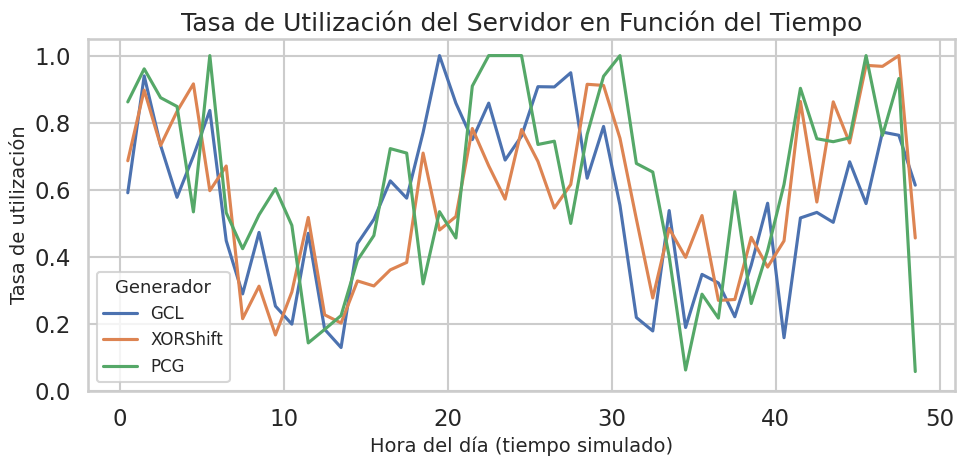

In [51]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_util_tiempo, x='Tiempo', y='Utilizacion', hue='Generador')

# Personalización
plt.ylim(0, 1.05)
plt.xlabel("Hora del día (tiempo simulado)", fontsize=14)
plt.ylabel("Tasa de utilización", fontsize=14)
plt.title("Tasa de Utilización del Servidor en Función del Tiempo", fontsize=18)
plt.legend(title="Generador", fontsize=12, title_fontsize=13)
plt.tight_layout()
plt.show()
